In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load Titanic dataset 
df = pd.read_csv('./data/UCI_heart.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    int64 
 2   trestbps       303 non-null    int64 
 3   chol           303 non-null    int64 
 4   fbs            303 non-null    int64 
 5   restecg        303 non-null    int64 
 6   thalach        303 non-null    int64 
 7   exang          303 non-null    int64 
 8   Heart_problem  303 non-null    int64 
 9   Age_Quantile   303 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.8+ KB


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,Heart_problem,Age_Quantile_Q1,Age_Quantile_Q2,Age_Quantile_Q3,Age_Quantile_Q4
0,63,1,145,233,1,2,150,0,0,False,False,False,True
1,67,1,160,286,0,2,108,1,1,False,False,False,True
2,67,1,120,229,0,2,129,1,1,False,False,False,True
3,37,1,130,250,0,0,187,0,0,True,False,False,False
4,41,0,130,204,0,2,172,0,0,True,False,False,False


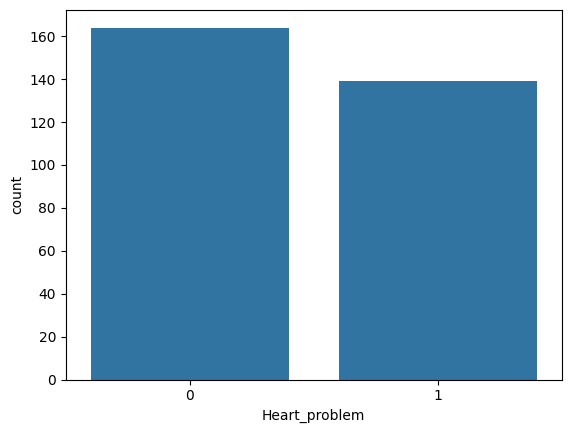

In [3]:
df= pd.get_dummies(df, columns=["Age_Quantile"])

# print(df['Heart_Problem'].value_counts())
# print(df['Heart_Problem'].value_counts())
# print( (df['Heart_Problem'].value_counts()/ df['Heart_Problem'].value_counts().sum()) * 100)

sns.countplot(data=df, x='Heart_problem')
df.head()

In [4]:
attr = df[["sex", "fbs", "restecg", "exang", "Age_Quantile_Q1","Age_Quantile_Q2","Age_Quantile_Q3","Age_Quantile_Q4"]]
target = df["Heart_problem"]

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.25, random_state=5)

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=7)


In [6]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
 

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.7763157894736842
[[39  9]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.69      0.71      0.70        28

    accuracy                           0.78        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.78      0.78      0.78        76



In [8]:
# Export the first three decision trees from the forest
## requires graphviz
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [9]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.16270909 0.09155704 0.15066275 0.34025571 0.06183129 0.05248463
 0.08858806 0.05191143]

Mean Decrease GINI= [0.08065829 0.04538673 0.07468667 0.16867185 0.03065106 0.02601773
 0.04391495 0.02573358]


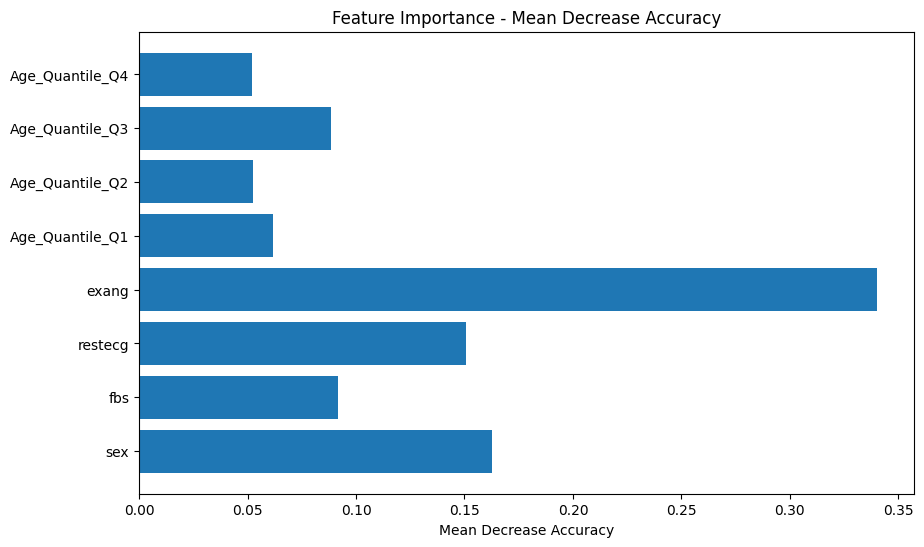

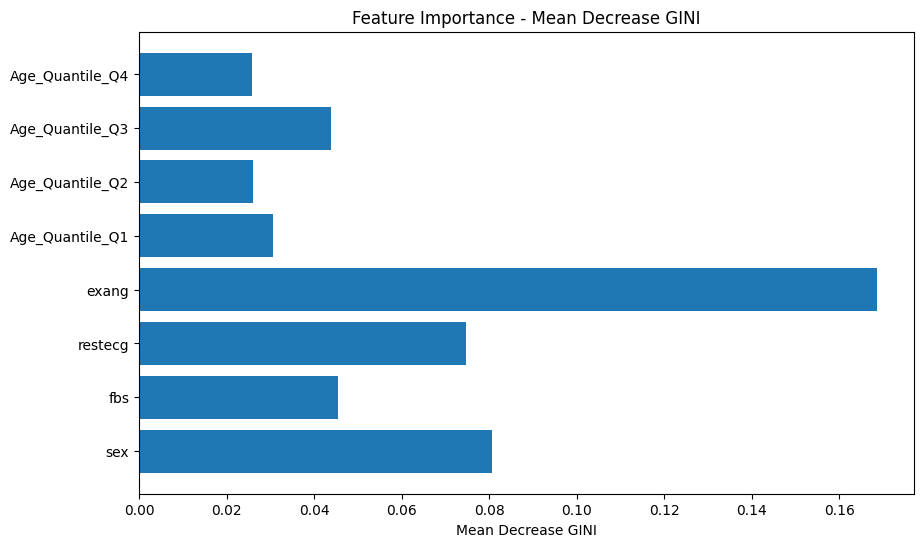

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [11]:

feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

exang              0.340256
sex                0.162709
restecg            0.150663
fbs                0.091557
Age_Quantile_Q3    0.088588
Age_Quantile_Q1    0.061831
Age_Quantile_Q2    0.052485
Age_Quantile_Q4    0.051911
dtype: float64
